In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
def plot_df(old_df, step=100, plot=False):
    new_df = pd.DataFrame()
    for i in range(0, len(old_df), step):
        new_df = new_df.append(old_df[0+i:step+i].mean(), ignore_index=True)
    if plot:
        plt.plot(new_df)
    return new_df    

In [25]:
## Lunar Landers
#ddpglander = 
ddpghopper0 = pd.read_csv("ddpg_HopperBulletEnv-v0_40000_run_0_games.csv")
ddpghopper1 = pd.read_csv("ddpg_HopperBulletEnv-v0_40000_run_1_games.csv")
ddpghopper2 = pd.read_csv("ddpg_HopperBulletEnv-v0_40000_run_2_games.csv")
ddpgmcar = pd.read_csv("ddpg_MountainCarContinuous-v0_20000.csv")

sacmcar = pd.read_csv("sac_MountainCarContinuous-v0_2500_run.csv")
sacmcar1 = pd.read_csv("sac_MountainCarContinuous-v0_20000_run.csv")

td3bullet = pd.read_csv("td3_HopperBulletEnv-v0_40000_run_0_games-steps.csv")
td3lander = pd.read_csv("td3_LunarLanderContinuous-v2_2500_run_2_games.csv")
td3mcar1 = pd.read_csv("td3_MountainCarContinuous-v0_20000_run_0_games.csv")
td3mcar2  = pd.read_csv("td3_MountainCarContinuous-v0_20000_run_1_games.csv")
td3mcar3  = pd.read_csv("td3_MountainCarContinuous-v0_20000_run_2_games.csv")

In [26]:
# Dropping unnamed column
ddpghopper2.drop('Unnamed: 0', axis=1, inplace=True)
sacmcar.drop('Unnamed: 0', axis=1, inplace=True)
td3bullet.drop('Unnamed: 0', axis=1, inplace=True)
td3lander.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:
td3mcar1['Steps'] = 999
td3mcar2['Steps'] = 999
td3mcar3['Steps'] = 999

In [40]:
ddpghopper0.loc[39801]

Scores    1765.8
Steps        NaN
Name: 39801, dtype: float64

In [45]:
ddpghopper0.dropna(inplace=True)
ddpghopper1.dropna(inplace=True)
ddpghopper2.dropna(inplace=True)

In [60]:
dfs = [ddpghopper0, ddpghopper1, ddpghopper2, ddpgmcar, sacmcar, sacmcar1, td3bullet, td3lander, td3mcar1, td3mcar2, td3mcar3]
for df in dfs:
    df['Steps'] = df['Steps'] + 1

In [104]:
for df in dfs:
    for i in range(1,len(df)):
        df.loc[i, 'Steps'] += df.loc[i-1][1]

<AxesSubplot:xlabel='Steps', ylabel='Scores'>

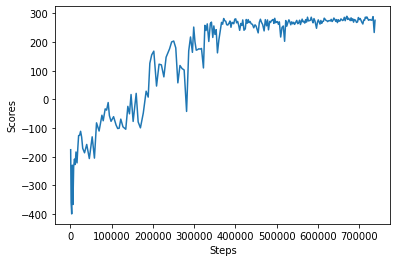

In [102]:
td3landerstepsc = plot_df(td3landersteps, step=10)
sns.lineplot(x="Steps", y="Scores", data=td3landerstepsc, ci='sd')

<AxesSubplot:xlabel='Steps', ylabel='Scores'>

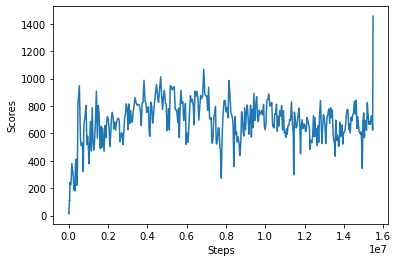

In [110]:
ddpghopper0c = plot_df(ddpghopper0, step=100)
sns.lineplot(x="Steps", y="Scores", data=ddpghopper0c, ci='sd')

In [135]:
ddpghopper0c = ddpghopper0.loc[ddpghopper0['Steps']<1000000]
ddpghopper1c = ddpghopper1.loc[ddpghopper1['Steps']<1000000]
ddpghopper2c = ddpghopper2.loc[ddpghopper2['Steps']<1000000]

ddpghopper0avg = plot_df(ddpghopper0c, step=10)
ddpghopper1avg = plot_df(ddpghopper1c, step=10)
ddpghopper2avg = plot_df(ddpghopper2c, step=10)

ddpghopper0avg['Run'] = 1
ddpghopper1avg['Run'] = 2
ddpghopper2avg['Run'] = 3

ddpghoppers = pd.concat([ddpghopper0avg, ddpghopper1avg, ddpghopper2avg])

<AxesSubplot:xlabel='Steps', ylabel='Scores'>

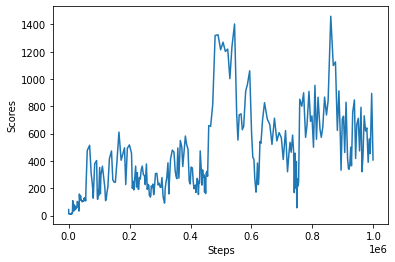

In [126]:
ddpghopper0c2plt = plot_df(ddpghopper0c2, step=10)
sns.lineplot(x="Steps", y="Scores", data=ddpghopper0c2plt, ci='sd')

<AxesSubplot:xlabel='Steps', ylabel='Scores'>

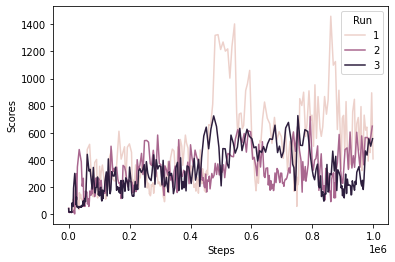

In [138]:
sns.lineplot(x="Steps", y="Scores", data=ddpghoppers, hue='Run', ci='sd')